# Проект №4. Авиарейсы без потерь

In [328]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [329]:
data = pd.read_csv('flights.csv')

Я собрала датасет с данными о всех случившихся авиарейсах из города Анапы за три зимних месяца прошлых лет.
Скачаем его датасет и посмотрим:

In [330]:
data.sample(5)

,flight_id,departure_city,arrival_city,actual_year,actual_month,actual_weekday,actual_duration,model,all_seats_cnt,real_seats_cnt,total_amount
104,136666,Anapa,Belgorod,2017,2,4,50.0,Sukhoi Superjet-100,97,87,2664100.0
140,136631,Anapa,Belgorod,2016,12,4,50.0,Sukhoi Superjet-100,97,90,2744800.0
96,136769,Anapa,Belgorod,2017,2,5,51.0,Sukhoi Superjet-100,97,88,2610800.0
61,136119,Anapa,Moscow,2017,1,2,101.0,Boeing 737-300,130,113,3869500.0
12,136293,Anapa,Moscow,2017,1,1,99.0,Boeing 737-300,130,114,4089500.0


### Описание колонок:

- flight_id - идентификатор перелета, уникален в нашем датасете
- departure_city - город вылета (всегда Анапа)
- arrival_city - город прилета
- actual_year - год, когда бы совершен перелет
- actual_month - масяц, когда был совершен перелет
- actual_weekday, день недели, когда был совершен перелет
- actual_duration - фактическое время в пути в минутах
- model - модель самолета, совершившего перелет
- all_seats_cnt - количество посадочных мест в данном виде самолета
- real_seats_cnt - фактическая заполненность самолета 
- total_amount - сумма проданных билетов на рейс

Посмотрим на всевозможные сочетания параметров:

In [331]:
data.groupby(by = ['actual_year', 'arrival_city', 'model', 'actual_month', 'actual_weekday']).size().reset_index()

,actual_year,arrival_city,model,actual_month,actual_weekday,0
0,2016,Belgorod,Sukhoi Superjet-100,12,1,4
1,2016,Belgorod,Sukhoi Superjet-100,12,2,4
2,2016,Belgorod,Sukhoi Superjet-100,12,3,4
3,2016,Belgorod,Sukhoi Superjet-100,12,4,5
4,2016,Belgorod,Sukhoi Superjet-100,12,5,5
5,2016,Belgorod,Sukhoi Superjet-100,12,6,5
6,2016,Belgorod,Sukhoi Superjet-100,12,7,4
7,2016,Moscow,Boeing 737-300,12,1,4
8,2016,Moscow,Boeing 737-300,12,2,4
9,2016,Moscow,Boeing 737-300,12,3,4


Первое, что бросается в глаза - это соотвествие города прилета и модели самолета. Проверим:

In [332]:
data.groupby(by = ['model', 'arrival_city'])['flight_id'].count().reset_index()

,model,arrival_city,flight_id
0,Boeing 737-300,Moscow,90
1,Sukhoi Superjet-100,Belgorod,90


Обнаружено взаимно однозначное соответствие между городом прилета и моделью самолета. Учтем в дальнейшем.

In [333]:
#Для удобства сортировки поменяем индексы месяцев:
month_dict = {1: '2', 2: '3', 12: '1'}
data['month_name'] = data['actual_month'].map(month_dict)

Посмотрим на загрузку рейсов в разрезе разных показателей. Найдем, сколько мест в каждом самолете.

In [334]:
data.groupby(by=['model'])['all_seats_cnt'].unique().reset_index()

,model,all_seats_cnt
0,Boeing 737-300,[130]
1,Sukhoi Superjet-100,[97]


In [335]:
def proc_bar(title, column, labels=()):
    prepare_data = data.groupby(by = column)['all_seats_cnt', 'real_seats_cnt'].sum().reset_index()
    bar_data_text = round(prepare_data['real_seats_cnt']*100/prepare_data['all_seats_cnt'], 2)
    bar_data_text = bar_data_text.astype('str').apply(lambda x: x+'%')
    fig = plt.figure()
    ax = fig.add_axes([0.0, 0.0, 1, 1])
    bar = ax.bar(x = prepare_data[column], height = prepare_data['all_seats_cnt'], label='Всего мест')
    ax.bar(x = prepare_data[column], height = prepare_data['real_seats_cnt'], label='Занято')
    ax.set_title(title, fontsize= 'xx-large')
    if len(labels) > 0:
        ax.set_xticklabels(labels)    
    #Надписи к барам
    for idx, rect in enumerate(bar):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.8*height,
                bar_data_text[idx],
                ha='center', va='bottom', rotation=0, fontsize= 'large')
    return    

<ipython-input-335-9cae5ec42881>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prepare_data = data.groupby(by = column)['all_seats_cnt', 'real_seats_cnt'].sum().reset_index()
<ipython-input-335-9cae5ec42881>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


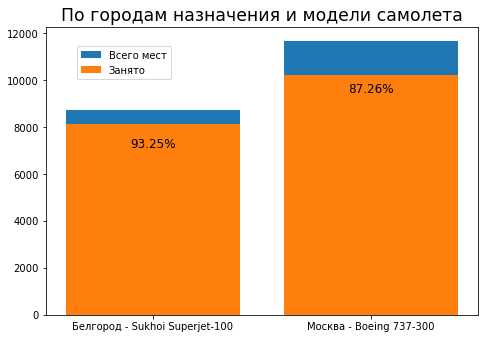

In [336]:
proc_bar('По городам назначения и модели самолета', 'arrival_city', ('Белгород - Sukhoi Superjet-100', 'Москва - Boeing 737-300'))
plt.legend(bbox_to_anchor=(0.3, 0.95))

В Москву загрузка меньше, но туда летает самолет с бОльшим количеством мест, поэтому в целом в Москву летало больше людей.

<ipython-input-335-9cae5ec42881>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prepare_data = data.groupby(by = column)['all_seats_cnt', 'real_seats_cnt'].sum().reset_index()
<ipython-input-335-9cae5ec42881>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


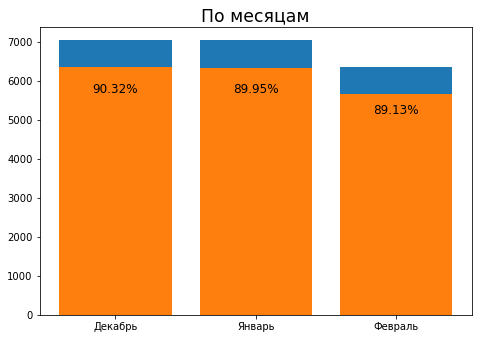

In [337]:
proc_bar('По месяцам', 'month_name', ('Декабрь', 'Январь', 'Февраль'))

<ipython-input-335-9cae5ec42881>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prepare_data = data.groupby(by = column)['all_seats_cnt', 'real_seats_cnt'].sum().reset_index()
<ipython-input-335-9cae5ec42881>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


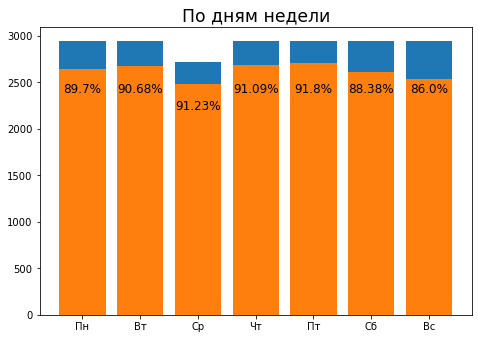

In [338]:
proc_bar('По дням недели', 'actual_weekday', ('', 'Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'))

Для оценки затрат на каждый рейс нам не хватает данных о стоимсти каждого рейса, этих данных не было в нашей базе данных.Но мы можем ввести некий условный показатель: доход на минуту полета. Сравним эту величину в разрезе разных показателей. Посчтаем, какой доход был бы при полной загрузке самолета.

In [363]:
data['max_amount'] = data['total_amount']*data['all_seats_cnt']/data['real_seats_cnt']
data.sample(5)

,flight_id,departure_city,arrival_city,actual_year,actual_month,actual_weekday,actual_duration,model,all_seats_cnt,real_seats_cnt,total_amount,month_name,max_amount,fact_revenue,max_revenue
31,136204,Anapa,Moscow,2017,2,4,100.0,Boeing 737-300,130,107,3609000.0,3,4.384766e+06,36090.000000,43847.663551
2,136266,Anapa,Moscow,2017,2,1,100.0,Boeing 737-300,130,108,3954400.0,3,4.759926e+06,39544.000000,47599.259259
156,136654,Anapa,Belgorod,2017,1,4,49.0,Sukhoi Superjet-100,97,96,2937400.0,2,2.967998e+06,59946.938776,60571.386054
35,136474,Anapa,Moscow,2016,12,5,98.0,Boeing 737-300,130,130,4590600.0,1,4.590600e+06,46842.857143,46842.857143
102,136929,Anapa,Belgorod,2016,12,6,50.0,Sukhoi Superjet-100,97,82,2390400.0,1,2.827668e+06,47808.000000,56553.365854


In [376]:
def revenue_bar(title, column, labels=()):
    prepare_data = data.groupby(by = column)['total_amount', 'max_amount', 'actual_duration'].sum().reset_index()
    prepare_data['fact_revenue'] = round(prepare_data['total_amount']/prepare_data['actual_duration'])
    prepare_data['max_revenue'] = round(prepare_data['max_amount']/prepare_data['actual_duration'])
    fig = plt.figure()
    ax = fig.add_axes([0.0, 0.0, 1, 1])
    bar = ax.bar(x = prepare_data[column], height = prepare_data['max_revenue'], label='Максимально возможная выручка')
    ax.bar(x = prepare_data[column], height = prepare_data['fact_revenue'], label='Фактическая выручка')
    ax.set_title(title, fontsize= 'xx-large')
    ax.set_ylabel('Условных ед.')
    if len(labels) > 0:
        ax.set_xticklabels(labels)    
    #Надписи к барам
    for idx, rect in enumerate(bar):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.93*height,
                prepare_data.iloc[idx]['max_revenue'],
                ha='center', va='bottom', rotation=0, fontsize= 'large')
        ax.text(rect.get_x() + rect.get_width()/2., 0.8*height,
                prepare_data.iloc[idx]['fact_revenue'],
                ha='center', va='bottom', rotation=0, fontsize= 'large')
    return

<ipython-input-372-4d127772021e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prepare_data = data.groupby(by = column)['total_amount', 'max_amount', 'actual_duration'].sum().reset_index()
<ipython-input-372-4d127772021e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


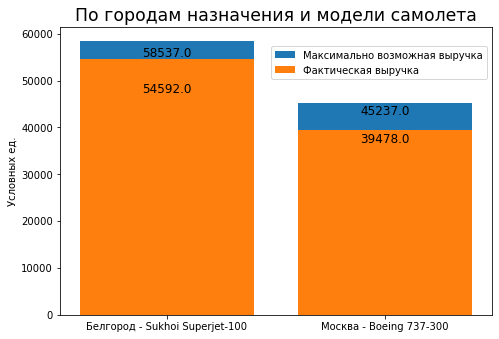

In [373]:
revenue_bar('По городам назначения и модели самолета', 'arrival_city', ('Белгород - Sukhoi Superjet-100', 'Москва - Boeing 737-300'))
plt.legend(bbox_to_anchor=(1, 0.95))

<ipython-input-372-4d127772021e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prepare_data = data.groupby(by = column)['total_amount', 'max_amount', 'actual_duration'].sum().reset_index()
<ipython-input-372-4d127772021e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


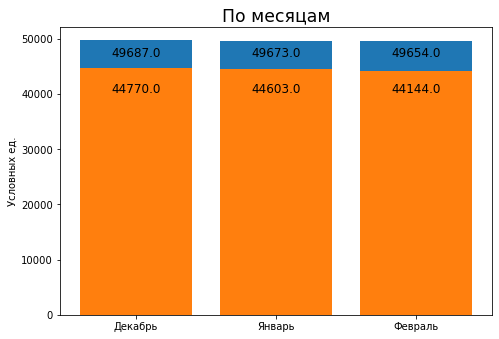

In [374]:
revenue_bar('По месяцам', 'month_name', ('Декабрь', 'Январь', 'Февраль'))

<ipython-input-372-4d127772021e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prepare_data = data.groupby(by = column)['total_amount', 'max_amount', 'actual_duration'].sum().reset_index()
<ipython-input-372-4d127772021e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


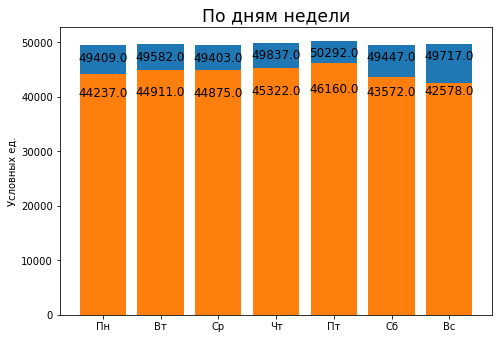

In [375]:
revenue_bar('По дням недели', 'actual_weekday', ('', 'Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'))

Наиболее сильные отличия в доходах на минуту полета среди разных городов прибытия (соответственно и моделей самолета).

Проверим количество рейсов по городам и месяцам, по городам и дням недели:

In [380]:
data.groupby(by=['month_name', 'arrival_city']).size().reset_index()

,month_name,arrival_city,0
0,1,Belgorod,31
1,1,Moscow,31
2,2,Belgorod,31
3,2,Moscow,31
4,3,Belgorod,28
5,3,Moscow,28


In [381]:
data.groupby(by=['actual_weekday', 'arrival_city']).size().reset_index()

,actual_weekday,arrival_city,0
0,1,Belgorod,13
1,1,Moscow,13
2,2,Belgorod,13
3,2,Moscow,13
4,3,Belgorod,12
5,3,Moscow,12
6,4,Belgorod,13
7,4,Moscow,13
8,5,Belgorod,13
9,5,Moscow,13


Распределение рейсов в города по месяцам и по дням недели одинаковое. Направление Москва приносит меньше дохода. Чтобы точно оценить прибыль, нужны данные по расходам на рейс.

Посчитаем показатель для презентации:

In [383]:
prepare_data = data.groupby(by = 'arrival_city')['total_amount', 'max_amount', 'actual_duration'].sum().reset_index()
prepare_data['fact_revenue'] = round(prepare_data['total_amount']/prepare_data['actual_duration'])
prepare_data['max_revenue'] = round(prepare_data['max_amount']/prepare_data['actual_duration'])
prepare_data

<ipython-input-383-71a39b104040>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prepare_data = data.groupby(by = 'arrival_city')['total_amount', 'max_amount', 'actual_duration'].sum().reset_index()


,arrival_city,total_amount,max_amount,actual_duration,fact_revenue,max_revenue
0,Belgorod,245718800.0,2.634743e+08,4501.0,54592.0,58537.0
1,Moscow,355180500.0,4.069999e+08,8997.0,39478.0,45237.0


In [400]:
round((prepare_data[prepare_data['arrival_city'] == 'Belgorod']['fact_revenue'].iloc[0]
 - prepare_data[prepare_data['arrival_city'] == 'Moscow']['fact_revenue'].iloc[0]
 )*100/prepare_data[prepare_data['arrival_city'] == 'Belgorod']['fact_revenue'].iloc[0], 1)

27.7